In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error

from sklearn.tree import plot_tree

## Dataset prepration

In [19]:
from sklearn.datasets import fetch_california_housing

# Fetch the California housing dataset as a pandas DataFrame
data = fetch_california_housing(as_frame=True)

# Print the description of the dataset
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [20]:
# Get the names of the features in the dataset
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [21]:
# Create a pandas DataFrame from the data in 'data.data'
X = pd.DataFrame(data.data, columns=data.feature_names)
X = X[['MedInc','HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]

# Extract the target variable from 'data'
y = data.target

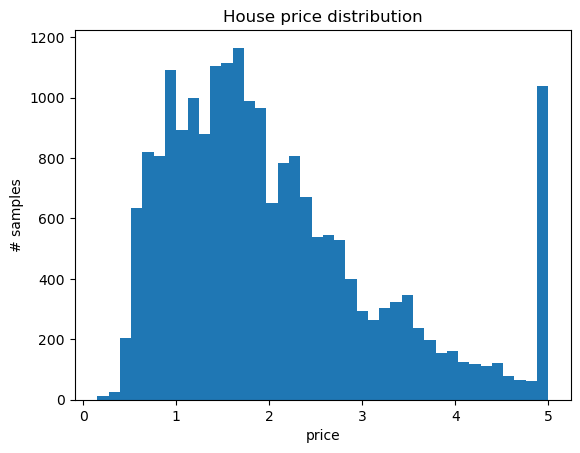

In [22]:
# Set the title of the plot as "House price distribution"
plt.title('House price distribution')

# Label the x-axis (horizontal axis) as "price"
plt.xlabel('price')

# Label the y-axis (vertical axis) as "# samples" (number of samples)
plt.ylabel('# samples')

# Create a histogram of the data in the variable 'y' using 40 bins
plt.hist(y, bins=40)

# Display the plot
plt.show()

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)


# Print the shapes of the resulting sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15480, 6) (5160, 6) (15480,) (5160,)


## Model fit / predict

In [27]:
# Create a DecisionTreeRegressor object
model = DecisionTreeRegressor()

# Define a dictionary of hyperparameters to explore during Grid Search
param_grid = {
  'max_depth': [None, 3, 5, 7, 9],  # Maximum depth of the tree
  'min_samples_split': [2, 5, 10],   # Minimum samples required to split a node
  'min_samples_leaf': [1, 2, 4],    # Minimum samples required at each leaf node
  'max_features': ['sqrt', 'log2', None]  # Maximum number of features considered for splitting a node
                                          # ('sqrt' - square root, 'log2' - log base 2)
}

# Create a GridSearchCV object to perform hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameter combination found by Grid Search
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [29]:
# Get the best model from the grid search results
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
predictions = best_model.predict(X_test)


# Calculate the Mean Absolute Error (MAE) between predicted and actual values
mae = mean_absolute_error(y_test, predictions)

# Print the MAE with three decimal places
print(f"MAE: {mae:.3f}")

MAE: 0.506


In [30]:
# Create a DataFrame of feature importances
features = pd.DataFrame({
    'feature': X.columns,  # Feature names from the original dataset
    'importance': best_model.feature_importances_  # Importance scores from the best model
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

# Display the DataFrame with feature importances
features

,feature,importance
0,MedInc,0.724096
1,AveOccup,0.152972
2,HouseAge,0.054886
3,AveRooms,0.047883
4,Population,0.012277
5,AveBedrms,0.007887


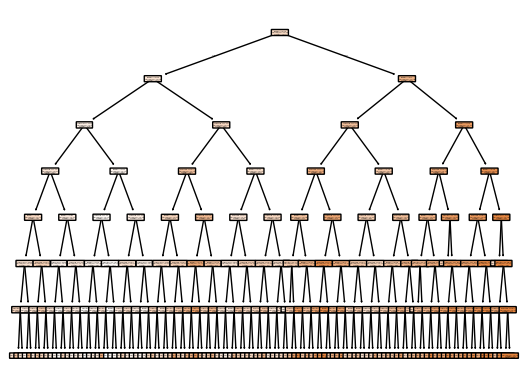

In [31]:
# Plot the decision tree
plot_tree(best_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()